# Data Science Lesson Example Workbook

The intent of this workbook is to introduce python packages and tools that enable the execution of several JQR  items for the Senior Developer Data Science JQR. This workbook will not go into extreme detail about every detail, but will provide a stepping off point for users to learn more about each topic. 

### Import Required Packages

In [1]:
from sklearn.preprocessing import Binarizer
import statistics as stats
import seaborn as sns
import pandas as pd
import numpy as np

example_array = [1, 2, 3, 3, 4, 9, 5]


### Import Data

In [2]:
penguins = pd.read_csv("penguins.csv", index_col = 0)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# 5.2 Data Processing

In the above table we see that there are missing values in 4th sample. We must determine what method to use to solve this problem. Do we want to drop that sample? Do we want to inpute values for those entries? Lets first determine how many samples contain missing values and if it will effect the variance in the sample

In [3]:
print(f'The number of rows and columns are {penguins.shape} respectively.')

The number of rows and columns are (344, 8) respectively.


## 5.2.07 Missing Values

In [4]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

We have a decision to make. It looks as though there are 2 entires were all the size information is gone. 2 out of the 344 entries is less than 1% of the data so it would be safe to remove these samples. Depending on what we are trying to predict we could either input the sex based on the other information or remove these samples as well.

In [5]:
penguins_notnull = penguins.dropna().reset_index(drop = True)
print(f'The new data frame shape is: {penguins_notnull.shape}.')
penguins_notnull.head()

The new data frame shape is: (333, 8).


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## 5.2.07 Duplicate values

In [6]:
pen_df = penguins_notnull.drop_duplicates().reset_index(drop = True)
print(f'The new data frame shape is: {pen_df.shape}.')
print("There were no duplicate values")
pen_df.head()

The new data frame shape is: (333, 8).
There were no duplicate values


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## 5.2.07 Inconsistent Values

Inconsistent values exist everywhere within real world data, especially data in which a consumer/user inputs the data theirself and does not select an option from a drop down list or prepopulated option. This is something to keep in mind when creating your own data collection methods and techniques. I digress. 

For example, if a survey asks for your biological sex, one person might put male, another Male, another MALE, and another M. Although these all represent one sex, the naming conventions represent four different ways of writing it. The computer sees these as four distinct sexes. We need to make sure there that these all get categorized as one sex and not four

In [7]:
pen_df['species'] = pen_df['species'].str.upper()
pen_df['island'] = pen_df['island'].str.upper()
pen_df['sex'] = pen_df['sex'].str.upper()
pen_df['year'] = pen_df['year'].astype(str)

My converting all strings to upper case values you eliminate capitalization inconsistency issues. Spelling can still be an issue. One way to discover this is by, doing a value count over each categorical column

In [8]:
pen_df['species'].value_counts()

ADELIE       146
GENTOO       119
CHINSTRAP     68
Name: species, dtype: int64

In [9]:
pen_df['island'].value_counts()

BISCOE       163
DREAM        123
TORGERSEN     47
Name: island, dtype: int64

In [10]:
pen_df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

## 5.2.07 Outliers 

Visualization and numerical analysis are two methods to determine outliers. Visualization methods include boxplots and scatter plots. Z-scores in combination witha threshold value can be used to determine numerical outliers.

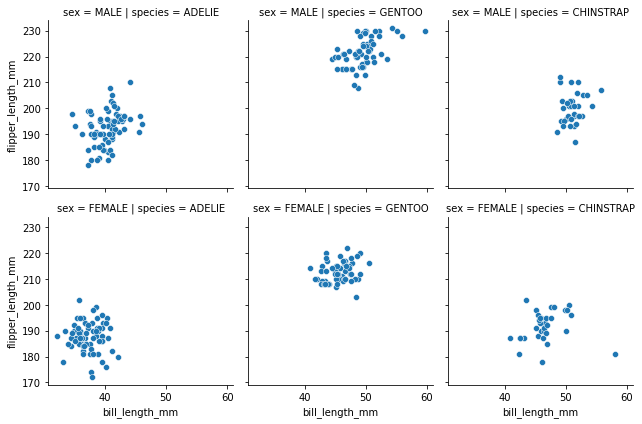

In [11]:
g = sns.FacetGrid(pen_df, col = 'species',row ='sex')
g.map(sns.scatterplot,'bill_length_mm','flipper_length_mm')

The pandas dataframe describe function is a powerful method that provides summary statisitcs for each column. For categorical variables, it will result in a NAN, but for numeric variables it provides mean standard deviation, min, max, and quartile values. 

In [12]:
pen_df.describe(include = np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Each has to make a decision on what outliers are and whether to keep them or not. I tend to keep as much data as possible the first pass, and remove outliers if the inital model does not work or is not accurate

## 5.2.07 Feature enrichment

Do we have outside information that we can add to our dataset that would provide more distinguishing information between penguin species? Not right now. However, we do know that living creaters tend to have porportional attributes. Perhaps we can created a scaled attribute or combination of features to represent this fact.

In [13]:
pen_df["bill_length_depth_ratio"] = pen_df['bill_length_mm'].to_numpy() / pen_df['bill_depth_mm'].to_numpy() 

In [14]:
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_depth_ratio
0,ADELIE,TORGERSEN,39.1,18.7,181.0,3750.0,MALE,2007,2.090909
1,ADELIE,TORGERSEN,39.5,17.4,186.0,3800.0,FEMALE,2007,2.270115
2,ADELIE,TORGERSEN,40.3,18.0,195.0,3250.0,FEMALE,2007,2.238889
3,ADELIE,TORGERSEN,36.7,19.3,193.0,3450.0,FEMALE,2007,1.901554
4,ADELIE,TORGERSEN,39.3,20.6,190.0,3650.0,MALE,2007,1.907767


## 5.2.07 Transformation

## 5.2.04 Binarization

Convert either a categorical variable that has two options (i.e. male/female, heart failure / no heart failure) or based on a cutoff value group a continous variable into two groups (less than threshold (0); greater than threshold (1)). Again, this is so that the computer can understand values.

In [15]:
pen_df.dtypes


species                     object
island                      object
bill_length_mm             float64
bill_depth_mm              float64
flipper_length_mm          float64
body_mass_g                float64
sex                         object
year                        object
bill_length_depth_ratio    float64
dtype: object

In [16]:
pen_df.sex = pen_df.sex.astype('category')
pen_df['sex_binary'] = pen_df.sex.cat.codes
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_depth_ratio,sex_binary
0,ADELIE,TORGERSEN,39.1,18.7,181.0,3750.0,MALE,2007,2.090909,1
1,ADELIE,TORGERSEN,39.5,17.4,186.0,3800.0,FEMALE,2007,2.270115,0
2,ADELIE,TORGERSEN,40.3,18.0,195.0,3250.0,FEMALE,2007,2.238889,0
3,ADELIE,TORGERSEN,36.7,19.3,193.0,3450.0,FEMALE,2007,1.901554,0
4,ADELIE,TORGERSEN,39.3,20.6,190.0,3650.0,MALE,2007,1.907767,1


In [17]:
pen_df.species = pen_df.species.astype('category')
pen_df['species_cat'] = pen_df.species.cat.codes
pen_df.island = pen_df.island.astype('category')
pen_df['island_cat'] = pen_df.island.cat.codes
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_depth_ratio,sex_binary,species_cat,island_cat
0,ADELIE,TORGERSEN,39.1,18.7,181.0,3750.0,MALE,2007,2.090909,1,0,2
1,ADELIE,TORGERSEN,39.5,17.4,186.0,3800.0,FEMALE,2007,2.270115,0,0,2
2,ADELIE,TORGERSEN,40.3,18.0,195.0,3250.0,FEMALE,2007,2.238889,0,0,2
3,ADELIE,TORGERSEN,36.7,19.3,193.0,3450.0,FEMALE,2007,1.901554,0,0,2
4,ADELIE,TORGERSEN,39.3,20.6,190.0,3650.0,MALE,2007,1.907767,1,0,2


## 5.2.04 One-hot Encoding

One hot encoding converts the categorical variable into multiple binary variables representing each possible category

In [18]:
one_hot_encoded_pen_df = pd.get_dummies(pen_df, columns=['species','island','sex'], prefix = ['species','island','sex']).head()

In [19]:
one_hot_encoded_pen_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,bill_length_depth_ratio,sex_binary,species_cat,island_cat,species_ADELIE,species_CHINSTRAP,species_GENTOO,island_BISCOE,island_DREAM,island_TORGERSEN,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,2007,2.090909,1,0,2,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,2.270115,0,0,2,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,2.238889,0,0,2,1,0,0,0,0,1,1,0
3,36.7,19.3,193.0,3450.0,2007,1.901554,0,0,2,1,0,0,0,0,1,1,0
4,39.3,20.6,190.0,3650.0,2007,1.907767,1,0,2,1,0,0,0,0,1,0,1


## 5.2.04 Descritization

Take a continous variable and convert to a categorical variable. This maybe desired for interpretability or presentation to a client. Numbers without context mean nothing. Including attributes like low medium high or poor average above average give insight into performance.

In [20]:
pen_df['weight_class'] = pd.cut(pen_df['body_mass_g'],3, labels=["Under-Weight",'Average','Over-Weight'])
pen_df.dtypes

species                    category
island                     category
bill_length_mm              float64
bill_depth_mm               float64
flipper_length_mm           float64
body_mass_g                 float64
sex                        category
year                         object
bill_length_depth_ratio     float64
sex_binary                     int8
species_cat                    int8
island_cat                     int8
weight_class               category
dtype: object

In [21]:
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_depth_ratio,sex_binary,species_cat,island_cat,weight_class
0,ADELIE,TORGERSEN,39.1,18.7,181.0,3750.0,MALE,2007,2.090909,1,0,2,Under-Weight
1,ADELIE,TORGERSEN,39.5,17.4,186.0,3800.0,FEMALE,2007,2.270115,0,0,2,Under-Weight
2,ADELIE,TORGERSEN,40.3,18.0,195.0,3250.0,FEMALE,2007,2.238889,0,0,2,Under-Weight
3,ADELIE,TORGERSEN,36.7,19.3,193.0,3450.0,FEMALE,2007,1.901554,0,0,2,Under-Weight
4,ADELIE,TORGERSEN,39.3,20.6,190.0,3650.0,MALE,2007,1.907767,1,0,2,Under-Weight


In [22]:
pen_df.weight_class.value_counts()

Under-Weight    150
Average         128
Over-Weight      55
Name: weight_class, dtype: int64

## 5.2.02 Normalization / Rescaling

https://www.geeksforgeeks.org/data-normalization-with-pandas/

Interpretability is a consequence that must be considered when altering or transforming data. There is an inflection point between the benefit and cost when altering or transforming data. We may transform the data and return an accurate model, but for some use cases that require the ability to explain the results and reasons for those results a less complicated, clear understanding of the input can help with interpretability and usability.

### Max Scaling

In [23]:
def max_scale(df):
    df_max_scaled = df.copy()
    i = 0
    for column in df_max_scaled.columns:
        if df_max_scaled.dtypes[i] == float :
            df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
        i+=1
    return(df_max_scaled)

In [24]:
df_max_scaled = max_scale(pen_df)

In [25]:
df_max_scaled.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_depth_ratio,sex_binary,species_cat,island_cat,weight_class
0,ADELIE,TORGERSEN,0.656040,0.869767,0.783550,0.595238,MALE,2007,0.578770,1,0,2,Under-Weight
1,ADELIE,TORGERSEN,0.662752,0.809302,0.805195,0.603175,FEMALE,2007,0.628375,0,0,2,Under-Weight
2,ADELIE,TORGERSEN,0.676174,0.837209,0.844156,0.515873,FEMALE,2007,0.619731,0,0,2,Under-Weight
3,ADELIE,TORGERSEN,0.615772,0.897674,0.835498,0.547619,FEMALE,2007,0.526356,0,0,2,Under-Weight
4,ADELIE,TORGERSEN,0.659396,0.958140,0.822511,0.579365,MALE,2007,0.528076,1,0,2,Under-Weight


### Min_Max Scaling

In [26]:
def min_max_scale(df):
    df_min_max_scaled = df.copy()
    i = 0
    for column in df_min_max_scaled.columns:
        if df_min_max_scaled.dtypes[i] == float :
            df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) 
        i+=1
    return(df_min_max_scaled)

In [27]:
min_max_scaled_pen_df = min_max_scale(pen_df)

In [28]:
min_max_scaled_pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_depth_ratio,sex_binary,species_cat,island_cat,weight_class
0,ADELIE,TORGERSEN,0.254545,0.666667,0.152542,0.291667,MALE,2007,0.228651,1,0,2,Under-Weight
1,ADELIE,TORGERSEN,0.269091,0.511905,0.237288,0.305556,FEMALE,2007,0.319487,0,0,2,Under-Weight
2,ADELIE,TORGERSEN,0.298182,0.583333,0.389831,0.152778,FEMALE,2007,0.303659,0,0,2,Under-Weight
3,ADELIE,TORGERSEN,0.167273,0.738095,0.355932,0.208333,FEMALE,2007,0.132672,0,0,2,Under-Weight
4,ADELIE,TORGERSEN,0.261818,0.892857,0.305085,0.263889,MALE,2007,0.135821,1,0,2,Under-Weight


### Z-score Normalization

In [29]:
def z_scale(df):
    df_z_scaled = df.copy()
    i = 0
    for column in df_z_scaled.columns:
        if df_z_scaled.dtypes[i] == float :
            df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()  
        i+=1
    return(df_z_scaled)

In [30]:
z_scaled_pen_df = z_scale(pen_df)

In [31]:
z_scaled_pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_depth_ratio,sex_binary,species_cat,island_cat,weight_class
0,ADELIE,TORGERSEN,-0.894695,0.779559,-1.424608,-0.567621,MALE,2007,-1.042150,1,0,2,Under-Weight
1,ADELIE,TORGERSEN,-0.821552,0.119404,-1.067867,-0.505525,FEMALE,2007,-0.680437,0,0,2,Under-Weight
2,ADELIE,TORGERSEN,-0.675264,0.424091,-0.425733,-1.188572,FEMALE,2007,-0.743464,0,0,2,Under-Weight
3,ADELIE,TORGERSEN,-1.333559,1.084246,-0.568429,-0.940192,FEMALE,2007,-1.424348,0,0,2,Under-Weight
4,ADELIE,TORGERSEN,-0.858123,1.744400,-0.782474,-0.691811,MALE,2007,-1.411808,1,0,2,Under-Weight


# 5.3 Data Visualization

## 5.3.02 Data Plotting Techniques

### Scatter Plot

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

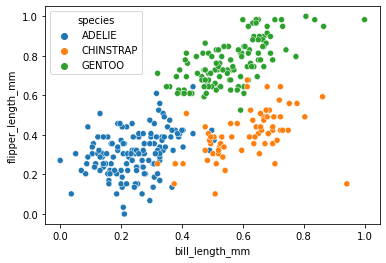

In [32]:
sns.scatterplot(data = min_max_scaled_pen_df, x ='bill_length_mm', y= 'flipper_length_mm', hue = 'species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

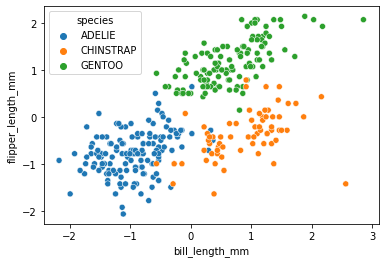

In [33]:
sns.scatterplot(data = z_scaled_pen_df, x ='bill_length_mm', y= 'flipper_length_mm', hue = 'species')

### Box and Whisker Plot

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

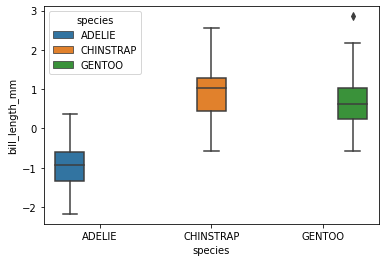

In [35]:
sns.boxplot(data = z_scaled_pen_df, x ='species', y = 'bill_length_mm', hue = 'species')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

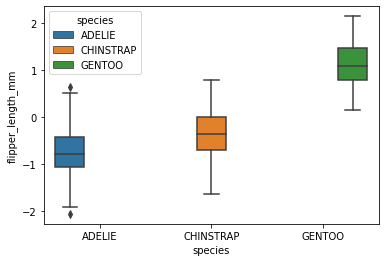

In [36]:
sns.boxplot(data = z_scaled_pen_df, x ='species', y = 'flipper_length_mm', hue = 'species')

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

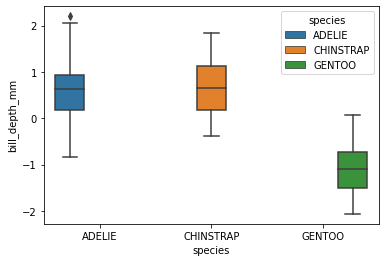

In [37]:
sns.boxplot(data = z_scaled_pen_df, x ='species', y = 'bill_depth_mm', hue = 'species')

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

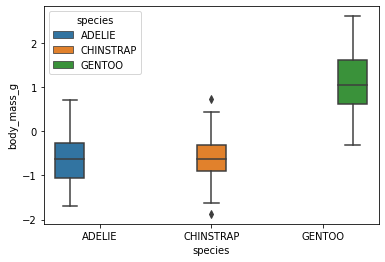

In [38]:
sns.boxplot(data = z_scaled_pen_df, x ='species', y = 'body_mass_g', hue = 'species')

### Histogram

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

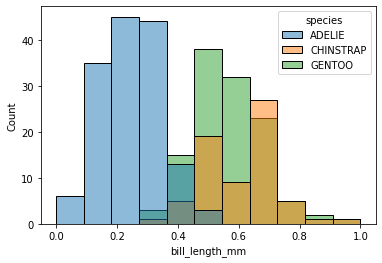

In [39]:
sns.histplot(data = min_max_scaled_pen_df, x ='bill_length_mm', hue = 'species')

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

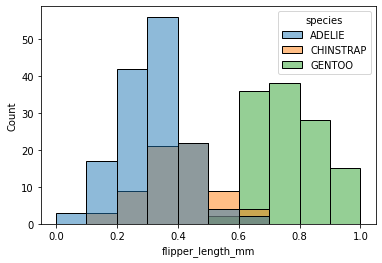

In [40]:
sns.histplot(data = min_max_scaled_pen_df, x ='flipper_length_mm', hue = 'species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='Count'>

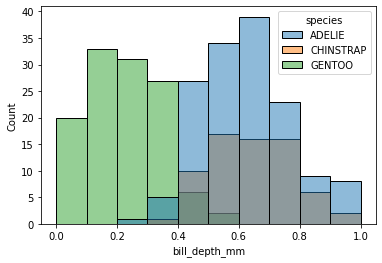

In [41]:
sns.histplot(data = min_max_scaled_pen_df, x ='bill_depth_mm', hue = 'species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='Count'>

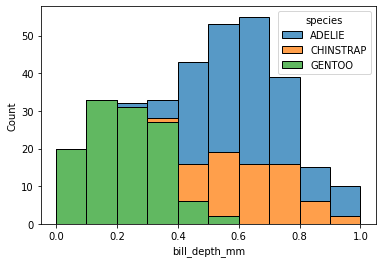

In [42]:
sns.histplot(data = min_max_scaled_pen_df, x ='bill_depth_mm', hue = 'species', multiple = 'stack')

### Bar plot

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

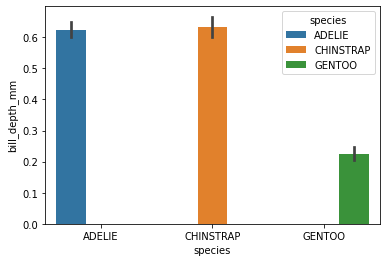

In [43]:
sns.barplot(data = min_max_scaled_pen_df, x ='species', y = 'bill_depth_mm', hue = 'species')

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

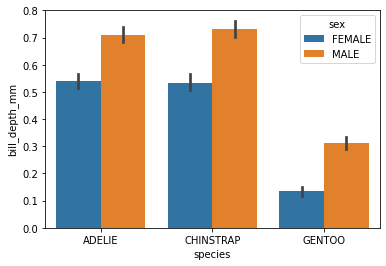

In [44]:
sns.barplot(data = min_max_scaled_pen_df, x ='species', y = 'bill_depth_mm', hue = 'sex')

### Contour Plot

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

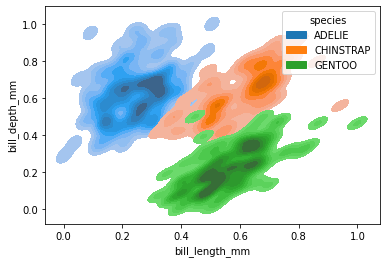

In [45]:
sns.kdeplot(data = min_max_scaled_pen_df, x ='bill_length_mm', y = 'bill_depth_mm', shade = True, bw_adjust=.5, hue = 'species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

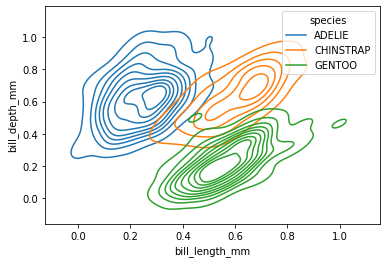

In [46]:
sns.kdeplot(data = min_max_scaled_pen_df, x ='bill_length_mm', y = 'bill_depth_mm', hue = 'species')

### Facet Plots

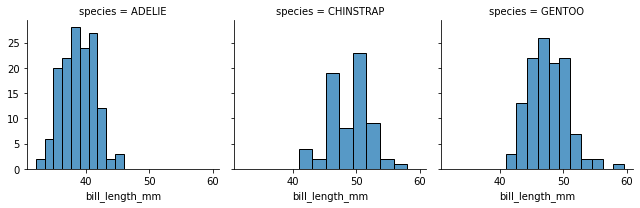

In [47]:
g = sns.FacetGrid(pen_df, col = 'species')
g.map(sns.histplot, "bill_length_mm")

## 5.3.04 Correlate Data Sets to identify patterns

In [48]:
pen_df.corr(method = 'pearson')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_depth_ratio,sex_binary,species_cat,island_cat
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.779230,0.344078,0.730548,-0.337179
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.781246,0.372673,-0.740346,0.568031
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.801980,0.255169,0.850737,-0.554413
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.702179,0.424987,0.750434,-0.559526
bill_length_depth_ratio,0.779230,-0.781246,0.801980,0.702179,1.000000,-0.004569,0.947589,-0.589550
sex_binary,0.344078,0.372673,0.255169,0.424987,-0.004569,1.000000,0.010964,-0.012435
species_cat,0.730548,-0.740346,0.850737,0.750434,0.947589,0.010964,1.000000,-0.622428
island_cat,-0.337179,0.568031,-0.554413,-0.559526,-0.589550,-0.012435,-0.622428,1.000000


In [49]:
pen_df.corr(method = 'kendall')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_depth_ratio,sex_binary,species_cat,island_cat
bill_length_mm,1.000000,-0.118240,0.481989,0.427760,0.568176,0.291070,0.556524,-0.230133
bill_depth_mm,-0.118240,1.000000,-0.277464,-0.192372,-0.554429,0.315852,-0.553304,0.463258
flipper_length_mm,0.481989,-0.277464,1.000000,0.661460,0.537830,0.223130,0.681604,-0.435435
body_mass_g,0.427760,-0.192372,0.661460,1.000000,0.439389,0.359280,0.569387,-0.461693
bill_length_depth_ratio,0.568176,-0.554429,0.537830,0.439389,1.000000,-0.006796,0.792395,-0.466845
sex_binary,0.291070,0.315852,0.223130,0.359280,-0.006796,1.000000,0.010248,-0.011159
species_cat,0.556524,-0.553304,0.681604,0.569387,0.792395,0.010248,1.000000,-0.593505
island_cat,-0.230133,0.463258,-0.435435,-0.461693,-0.466845,-0.011159,-0.593505,1.000000


In [50]:
pen_df.corr(method = 'spearman')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_depth_ratio,sex_binary,species_cat,island_cat
bill_length_mm,1.000000,-0.213859,0.669754,0.576480,0.782774,0.355034,0.742217,-0.302705
bill_depth_mm,-0.213859,1.000000,-0.517317,-0.429283,-0.753367,0.383489,-0.712629,0.586349
flipper_length_mm,0.669754,-0.517317,1.000000,0.840390,0.757335,0.269617,0.822955,-0.542180
body_mass_g,0.576480,-0.429283,0.840390,1.000000,0.656213,0.436536,0.722822,-0.584001
bill_length_depth_ratio,0.782774,-0.753367,0.757335,0.656213,1.000000,-0.008310,0.922454,-0.566195
sex_binary,0.355034,0.383489,0.269617,0.436536,-0.008310,1.000000,0.010804,-0.011662
species_cat,0.742217,-0.712629,0.822955,0.722822,0.922454,0.010804,1.000000,-0.617378
island_cat,-0.302705,0.586349,-0.542180,-0.584001,-0.566195,-0.011662,-0.617378,1.000000


Analyze the correlation between the prediction variable (Species Category) and other variables. IF the absolute value of the coefficent is greater than 0.5 retain the variable.

Sex is not correlated with the species type. In other words sex is not a good predictor of species which makes sense. Most populations have about equal female to male populations which means in the context of this problem that the distribution between female and male is not statstitiscally differrent

## 5.3.6 Perform analysis on a data set to identify the mean/distribution of the data

In [51]:
pen_df.describe(include = np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_depth_ratio,sex_binary,species_cat,island_cat
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2.607228,0.504505,0.918919,0.651652
std,5.468668,1.969235,14.015765,805.215802,0.495436,0.500732,0.889718,0.714715
min,32.100000,13.100000,172.000000,2700.000000,1.639810,0.000000,0.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,2.162651,0.000000,0.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,2.576531,1.000000,1.000000,1.000000
75%,48.600000,18.700000,213.000000,4775.000000,3.096970,1.000000,2.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,3.612676,1.000000,2.000000,2.000000


In [52]:
min_max_scaled_pen_df.describe(include = np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_depth_ratio,sex_binary,species_cat,island_cat
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.432465,0.483912,0.490966,0.418627,0.490361,0.504505,0.918919,0.651652
std,0.198861,0.234433,0.237555,0.223671,0.251125,0.500732,0.889718,0.714715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111,0.265016,0.000000,0.000000,0.000000
50%,0.450909,0.500000,0.423729,0.375000,0.474802,1.000000,1.000000,1.000000
75%,0.600000,0.666667,0.694915,0.576389,0.738600,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [53]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
def dist_finder(column):
    dist_names = ['gamma', 'beta', 'rayleigh', 'norm']

    results = []
    for i in dist_names:
        dist = getattr(stats, i)
        param = dist.fit(pen_df[column])
        a = stats.kstest(pen_df[column], i, args=param)
        results.append((i,a[0],a[1]))


    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results:
        print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

In [54]:
dist_finder('bill_depth_mm')

beta: statistic=0.07456337836878585, pvalue=0.0468174337130374
norm: statistic=0.0801111954095538, pvalue=0.026308550879920033
gamma: statistic=0.08590671754034995, pvalue=0.013786124998475412
rayleigh: statistic=0.12232110337592073, pvalue=8.435764089585537e-05


In [55]:
dist_finder('bill_length_mm')

norm: statistic=0.07123428082378708, pvalue=0.06486415659916309
gamma: statistic=0.0731798027077184, pvalue=0.053708023489075114
beta: statistic=0.0798355695223898, pvalue=0.027099191640183786
rayleigh: statistic=0.11739061949195406, pvalue=0.00018680967796154147


In [56]:
dist_finder('flipper_length_mm')

rayleigh: statistic=0.08345846968639425, pvalue=0.01821345450302763
gamma: statistic=0.09375786950458997, pvalue=0.005345112843149397
beta: statistic=0.11005101519170851, pvalue=0.0005739416126073038
norm: statistic=0.12510215891210075, pvalue=5.309415498465743e-05


In [57]:
dist_finder('body_mass_g')

gamma: statistic=0.05558230232555722, pvalue=0.2462260853769027
rayleigh: statistic=0.06527435272897042, pvalue=0.11204436502834669
beta: statistic=0.07250376654603319, pvalue=0.057381336957070296
norm: statistic=0.10589032496917372, pvalue=0.001049884030513656


# 5.5 Statistics

## 5.5.02 Statistical Measures

For the following examples we will focus on one column of the penguins data set to demonstrate how to implement a variety of different statistical measures. 

In [58]:
example_array = pen_df.bill_length_mm.to_numpy()

## Mean

In [59]:
def mean(array):
    mean_value = sum(array) / len(array)
    return mean_value

In [60]:
array_mean = mean(example_array)
print(f'The mean of the example array is: {array_mean}.')

The mean of the example array is: 43.99279279279281.


In [61]:
pen_df.mean()

bill_length_mm               43.992793
bill_depth_mm                17.164865
flipper_length_mm           200.966967
body_mass_g                4207.057057
bill_length_depth_ratio       2.607228
sex_binary                    0.504505
species_cat                   0.918919
island_cat                    0.651652
dtype: float64

## Median

In [62]:
def median(array):
    if len(array) % 2 == 1:
        median_value = sorted(array)[len(array)//2]
    else:
        median_value = sorted(array)[len(array)/2] + sorted(array)[(len(array)/2) + 1]
    return median_value

In [63]:
array_median = median(example_array)
print(f'The median of the array is: {array_median}')

The median of the array is: 44.5


In [64]:
pen_df.median()

bill_length_mm               44.500000
bill_depth_mm                17.300000
flipper_length_mm           197.000000
body_mass_g                4050.000000
bill_length_depth_ratio       2.576531
sex_binary                    1.000000
species_cat                   1.000000
island_cat                    1.000000
dtype: float64

## Mode

In [65]:
def mode(array):
    mode_value = max(list(array), key = list(array).count)
    return(mode_value)

In [66]:
example_array_mode = mode(example_array)
print(f'The mode of the array is: {example_array_mode}')

The mode of the array is: 41.1


In [67]:
pen_df.mean()

bill_length_mm               43.992793
bill_depth_mm                17.164865
flipper_length_mm           200.966967
body_mass_g                4207.057057
bill_length_depth_ratio       2.607228
sex_binary                    0.504505
species_cat                   0.918919
island_cat                    0.651652
dtype: float64

## Quantiles

In [68]:
pen_df.quantile([0.25,0.5,0.75])


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_depth_ratio,sex_binary,species_cat,island_cat
0.25,39.5,15.6,190.0,3550.0,2.162651,0.0,0.0,0.0
0.50,44.5,17.3,197.0,4050.0,2.576531,1.0,1.0,1.0
0.75,48.6,18.7,213.0,4775.0,3.096970,1.0,2.0,1.0


## Variance

In [69]:
pen_df.var(axis = 0)

bill_length_mm                 29.906333
bill_depth_mm                   3.877888
flipper_length_mm             196.441677
body_mass_g                648372.487699
bill_length_depth_ratio         0.245457
sex_binary                      0.250733
species_cat                     0.791599
island_cat                      0.510818
dtype: float64

## Standard Deviation

In [70]:
pen_df.std(axis = 0)

bill_length_mm               5.468668
bill_depth_mm                1.969235
flipper_length_mm           14.015765
body_mass_g                805.215802
bill_length_depth_ratio      0.495436
sex_binary                   0.500732
species_cat                  0.889718
island_cat                   0.714715
dtype: float64

## Covariance

In [71]:
pen_df.cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_depth_ratio,sex_binary,species_cat,island_cat
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304,2.111228,0.942201,3.554534,-1.317880
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122,-0.762207,0.367478,-1.297134,0.799471
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649,5.568882,1.790812,10.608759,-5.553710
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699,280.122275,171.353658,537.622110,-322.007173
bill_length_depth_ratio,2.111228,-0.762207,5.568882,280.122275,0.245457,-0.001133,0.417696,-0.208757
sex_binary,0.942201,0.367478,1.790812,171.353658,-0.001133,0.250733,0.004884,-0.004450
species_cat,3.554534,-1.297134,10.608759,537.622110,0.417696,0.004884,0.791599,-0.395799
island_cat,-1.317880,0.799471,-5.553710,-322.007173,-0.208757,-0.004450,-0.395799,0.510818


# 5.10 Data Science Metrics / Techniques

## 5.10.02 Loss Functions

### Regression Loss Functions

#### Mean Square Error (MSE)

In [76]:
def MSE(actual, prediction):
    difference = np.array(prediction) - np.array(actual)
    diff_squared = difference ** 2
    mse = diff_squared.mean()
    return mse

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
act = [2,5,7]
pred = [3,5,2]
 
print(MSE(act,pred))
print(mean_squared_error(act,pred))

8.666666666666666
8.666666666666666


#### Root Mean Squared Error (RMSE)

In [79]:
def RMSE(actual, prediction):
    difference = np.array(prediction) - np.array(actual)
    diff_squared = difference ** 2
    mse = diff_squared.mean()
    rmse = np.sqrt(mse)
    return rmse


In [80]:
print(RMSE(act,pred))
mean_squared_error(act, pred, squared = False)

2.943920288775949


2.943920288775949

#### Mean Absolute Error (MAE) 

In [81]:
def MAE(actual, prediction):
    difference = np.array(prediction) - np.array(actual)
    absolute_difference = np.absolute(difference)
    mae = absolute_difference.mean()
    return mae

In [82]:
from sklearn.metrics import mean_absolute_error

In [83]:
print(MAE(act,pred))
print(mean_absolute_error(act, pred))

2.0
2.0


### Classification Loss Functions

#### Cross-entropy loss

In [84]:
from sklearn.metrics import log_loss

In [85]:
actual = ["spam", "ham", "ham", "spam"]
prediction = [[.1, .9], [.9, .1], [.8, .2], [.35, .65]]
log_loss(actual, prediction)

0.21616187468057912

#### Hamming Loss

In [86]:
from sklearn.metrics import hamming_loss
y_pred = [1, 2, 3, 4]
y_true = [2, 2, 3, 4]
hamming_loss(y_true, y_pred)

0.25

### Area Under the Curve (AUC)

In [87]:
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
metrics.auc(fpr, tpr)

0.75

### Type 1 Error

False postives. OR in other words the upper right quadrant in your confusion matrix.

### Type 2 Error

This is your False negatives. Or in other words the lower left quadrant in your confusion matrix.

### Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix
y_true = [0, 1, 0, 1, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 0, 1]

print(confusion_matrix(y_true, y_pred, labels = [0,1]))
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn,fp,fn,tp)

[[0 4]
 [2 1]]


(0, 4, 2, 1)

The type one error is 4/7

The type 2 error is 2/7

<AxesSubplot:>

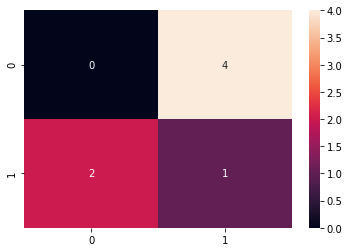

In [89]:
annot_kws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, annot_kws=annot_kws)

### Validation Accuracy

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.20      0.33      0.25         3

    accuracy                           0.14         7
   macro avg       0.10      0.17      0.12         7
weighted avg       0.09      0.14      0.11         7



### Grid Search / Parameter Tuning

In [91]:
param = {'max_depth': [6,9, None], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': [2],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False]}

In [92]:
x = pen_df[['bill_depth_mm','bill_length_mm']].to_numpy()

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rnd_search = GridSearchCV(RandomForestClassifier(), param)
rnd_search.fit(x,pen_df.species_cat)
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 2, 'n_estimators': 100}
0.9639529624604251


### Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rnd_search, x, pen_df.species_cat, scoring = 'accuracy', cv = 5)

In [95]:
print(f'The Model Accuracy for this Model with 5-fold Cross Validation is: {accuracy.mean()*100}%')

The Model Accuracy for this Model with 5-fold Cross Validation is: 95.79375848032564%
